# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [106]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

from imblearn.over_sampling import SMOTE


In [107]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

In [108]:
target_distribution = fraud['fraud'].value_counts(normalize=True)
print(target_distribution)

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


It is imbalanced 91.3% no fraud, 8.7% fraud

2. Train a LogisticRegression.

In [109]:
features = fraud.drop('fraud', axis=1)
target = fraud['fraud']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, stratify=target, random_state=0)

# Train model
model = LogisticRegression(max_iter=1000, class_weight=None)  # no class weight yet
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [110]:
model.score(X_test, y_test)

0.95901

3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [111]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Baseline Logistic Regression (Imbalanced):")
print(classification_report(y_test, y_pred, digits=4))

Baseline Logistic Regression (Imbalanced):
              precision    recall  f1-score   support

         0.0     0.9630    0.9932    0.9779    182519
         1.0     0.8950    0.6016    0.7196     17481

    accuracy                         0.9590    200000
   macro avg     0.9290    0.7974    0.8487    200000
weighted avg     0.9571    0.9590    0.9553    200000



4. Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?

In [112]:
train = pd.DataFrame(X_train, columns=X_train.columns, index=X_train.index)
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
913543,18.906872,0.196834,0.926381,1.0,0.0,0.0,1.0
228218,2.498872,0.276495,0.826276,1.0,1.0,0.0,1.0
161603,89.833336,0.857690,1.039790,1.0,0.0,0.0,1.0
11700,6.542088,0.788591,3.627773,1.0,1.0,0.0,1.0
523721,1.360545,0.200768,2.475746,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
663227,14.974399,0.075278,2.225979,1.0,0.0,0.0,1.0
661920,3.007973,1.130571,1.287118,1.0,0.0,0.0,1.0
744511,4.002356,17.581339,0.173926,1.0,1.0,0.0,1.0
182216,18.577777,2.900590,0.416743,1.0,0.0,0.0,1.0


In [113]:
train["fraud"] = y_train.values

In [114]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [115]:
len(fraud),len(no_fraud)

(69922, 730078)

In [116]:
yes_oversampled = resample(fraud,
                                    replace=True,
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [117]:
train_over = pd.concat([yes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
548634,43.646158,0.043985,4.503093,1.0,0.0,0.0,1.0,1.0
831731,0.956353,6.661664,6.407501,0.0,0.0,0.0,0.0,1.0
907690,189.993707,2.423272,0.725825,1.0,0.0,0.0,1.0,1.0
566324,20.486695,0.312520,5.877867,1.0,1.0,0.0,1.0,1.0
575234,25.306149,1.634001,4.647561,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
663227,14.974399,0.075278,2.225979,1.0,0.0,0.0,1.0,0.0
661920,3.007973,1.130571,1.287118,1.0,0.0,0.0,1.0,0.0
744511,4.002356,17.581339,0.173926,1.0,1.0,0.0,1.0,0.0
182216,18.577777,2.900590,0.416743,1.0,0.0,0.0,1.0,0.0


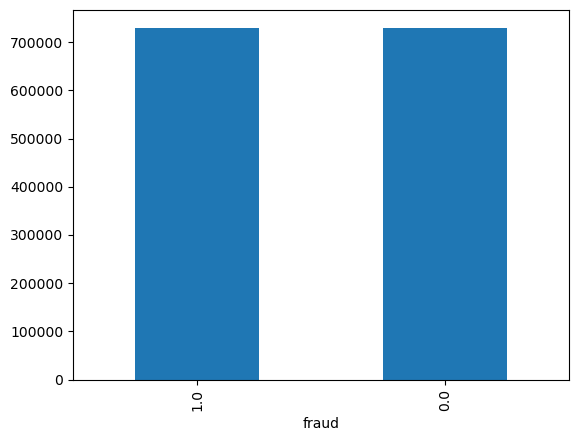

In [118]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [119]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [120]:
log_reg = LogisticRegression(max_iter=1000, class_weight=None)
log_reg.fit(X_train_over, y_train_over)

LogisticRegression(max_iter=1000)

In [121]:
y_pred_test_over = log_reg.predict(X_test)
print(classification_report(y_pred = y_pred_test_over, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.57      0.95      0.71     17481

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In this case, Over Sampling Model improve 95% of frauds compared to 60% baseline

5. Now, run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [122]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
913543,18.906872,0.196834,0.926381,1.0,0.0,0.0,1.0,0.0
228218,2.498872,0.276495,0.826276,1.0,1.0,0.0,1.0,0.0
161603,89.833336,0.857690,1.039790,1.0,0.0,0.0,1.0,0.0
11700,6.542088,0.788591,3.627773,1.0,1.0,0.0,1.0,0.0
523721,1.360545,0.200768,2.475746,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
663227,14.974399,0.075278,2.225979,1.0,0.0,0.0,1.0,0.0
661920,3.007973,1.130571,1.287118,1.0,0.0,0.0,1.0,0.0
744511,4.002356,17.581339,0.173926,1.0,1.0,0.0,1.0,0.0
182216,18.577777,2.900590,0.416743,1.0,0.0,0.0,1.0,0.0


In [123]:
no_undersampled = resample(no_fraud,
                                    replace=False,
                                    n_samples = len(fraud),
                                    random_state=0)
no_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
650271,9.406336,0.081320,1.653069,1.0,1.0,0.0,1.0,0.0
769052,88.469503,0.241747,0.026457,1.0,1.0,0.0,1.0,0.0
358998,15.043356,1.109265,0.163624,1.0,0.0,0.0,1.0,0.0
874603,53.962584,2.856560,1.447925,1.0,1.0,0.0,1.0,0.0
170006,3.858581,3.204060,4.487467,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
555278,3.669485,0.108798,0.951340,1.0,0.0,0.0,1.0,0.0
8107,27.533913,0.309655,0.754167,1.0,0.0,1.0,0.0,0.0
677945,80.415593,0.896184,0.414226,1.0,0.0,0.0,1.0,0.0
300864,12.951738,4.324003,0.567301,1.0,0.0,0.0,1.0,0.0


In [124]:
train_under = pd.concat([no_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
650271,9.406336,0.081320,1.653069,1.0,1.0,0.0,1.0,0.0
769052,88.469503,0.241747,0.026457,1.0,1.0,0.0,1.0,0.0
358998,15.043356,1.109265,0.163624,1.0,0.0,0.0,1.0,0.0
874603,53.962584,2.856560,1.447925,1.0,1.0,0.0,1.0,0.0
170006,3.858581,3.204060,4.487467,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
334906,0.711425,0.942760,7.333634,0.0,0.0,0.0,1.0,1.0
346652,9.829193,16.574500,8.512986,1.0,1.0,0.0,1.0,1.0
420797,35.017123,711.176188,1.532570,1.0,0.0,0.0,1.0,1.0
525819,1.146511,51.292800,3.024490,0.0,0.0,0.0,1.0,1.0


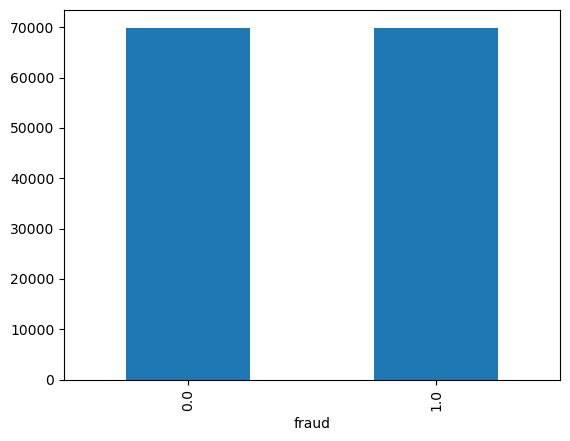

In [125]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [126]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [127]:
log_reg.fit(X_train_under, y_train_under)

LogisticRegression(max_iter=1000)

In [128]:
y_pred_test_under = log_reg.predict(X_test)
print(classification_report(y_pred = y_pred_test_under, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.57      0.95      0.71     17481

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [129]:
print("y_pred (oversampling) == y_pred (undersampling):", np.array_equal(y_pred_test_over, y_pred_test_under))

y_pred (oversampling) == y_pred (undersampling): False


In [130]:
np.sum(y_pred_test_over == y_pred_test_under)

199771

In [131]:
diff_indices = np.where(y_pred_test_over != y_pred_test_under)[0]
print("Number of different predictions:", len(diff_indices))

Number of different predictions: 229


After doing the testing, it stays the same, there is no improve with the undersampling.

6. Finally, run SMOTE in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [132]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [133]:
X_train_sm, y_train_sm =  sm.fit_resample(X_train,y_train) 

In [134]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [136]:
y_pred_test_log = log_reg.predict(X_test)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.57      0.95      0.71     17481

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



After the SMOTE, there is no difference, maybe because of the decimals. It can tell the the model has got to the maximum out performance.